In [1]:
RESULTS_ZIP_FILE = "../../results/ui2code/ui2code_10000.zip"
RESULTS_FOLDER_DESTINATION = "../../results/ui2code/"

In [2]:
import zipfile

with zipfile.ZipFile(RESULTS_ZIP_FILE, 'r') as zip_ref:
    zip_ref.extractall(RESULTS_FOLDER_DESTINATION)


In [3]:
RESULTS_FOLDER = "../../results/ui2code/ui2code_10000"

In [4]:
import os

list_all_files = os.listdir(RESULTS_FOLDER)
len(list_all_files)

2000

In [5]:
# NOTE: this was run from command line to use multiprocessing
#%run ../../utils/calculate_metrics --folder ../../results/ui2code/ui2code_10000 --ui2code

In [10]:
import pandas as pd
import os
import json

# Load all json files into a list of dataframes
all_json_files = [RESULTS_FOLDER + "/" + file for file in os.listdir(RESULTS_FOLDER) if file.endswith(".json")]

dataframes = []

for file_path in all_json_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
    dataframes.append(pd.DataFrame([data]))  # Convert dictionary to a single-row DataFrame

# Combine all dataframes into one
df = pd.concat(dataframes, ignore_index=True)


In [11]:
df.rename(columns={
    'len_pred': 'prediction_length',
    'len_answer': 'answer_length',
    'max_len': 'max_length',
    'bleu': 'BLEU_score',
    'ed': 'edit_distance',
    'n_ed': 'normalized_edit_distance',
}, inplace=True)


In [12]:
df.describe()

,prediction_length,answer_length,max_length,BLEU_score,edit_distance,normalized_edit_distance
count,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,880.043000,710.17900,925.103000,7.300868e-01,290.822000,0.268200
std,555.316199,398.61651,543.730536,2.640510e-01,395.743492,0.241022
min,46.000000,41.00000,46.000000,2.480501e-07,0.000000,0.000000
25%,419.000000,383.75000,474.250000,5.676929e-01,48.000000,0.074523
50%,758.500000,639.50000,858.000000,8.203325e-01,139.500000,0.197837
75%,1199.000000,1023.50000,1254.500000,9.428863e-01,362.250000,0.431641
max,2459.000000,1736.00000,2459.000000,1.000000e+00,2365.000000,0.966988


In [16]:
count_bleu_100 = (df['BLEU_score'] == 1.0).sum()
print(count_bleu_100)

151


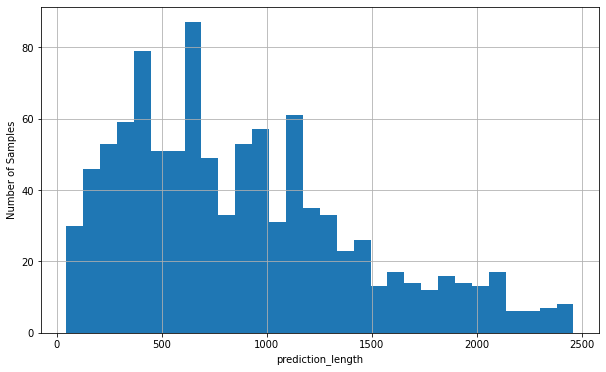

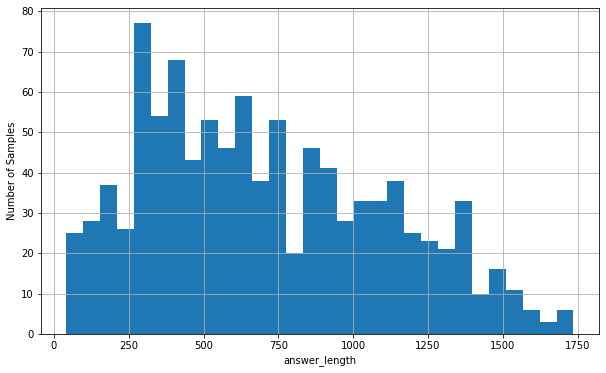

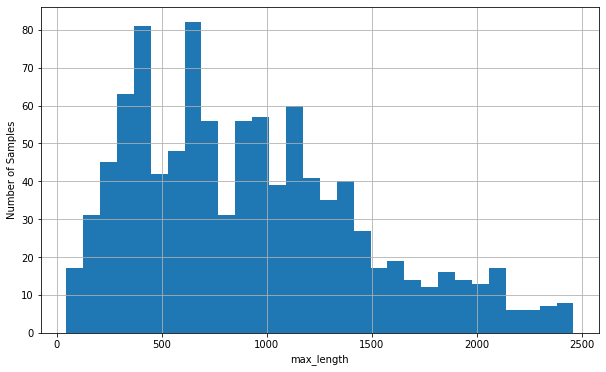

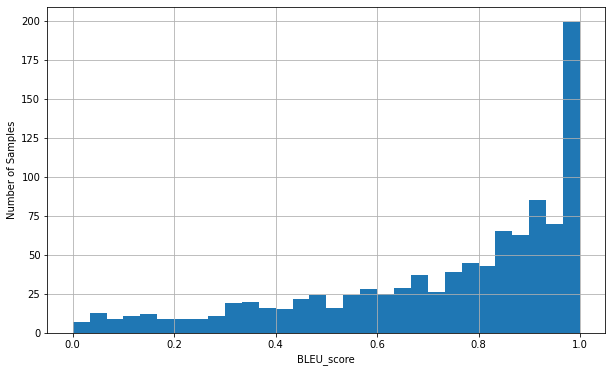

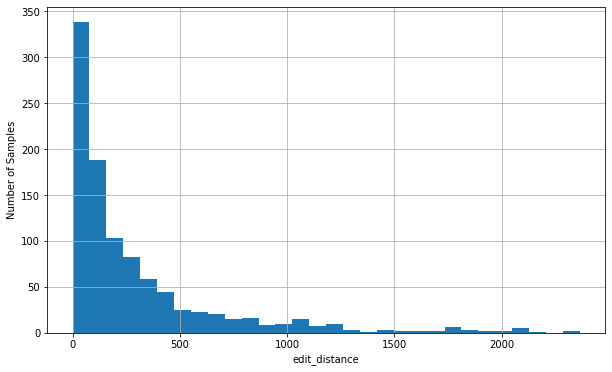

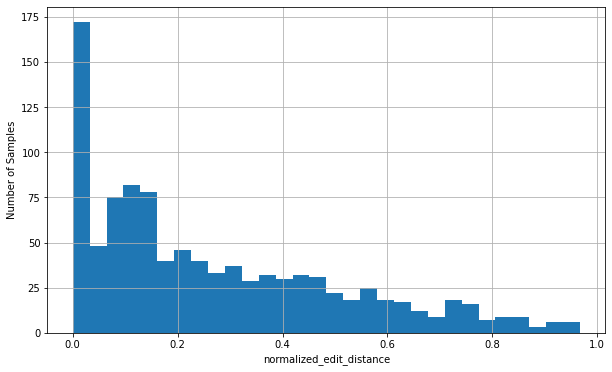

In [9]:
import matplotlib.pyplot as plt

metrics = ["prediction_length", "answer_length", "max_length", "BLEU_score", "edit_distance", "normalized_edit_distance"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    plt.hist(df[metric], bins=30)
    #plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Number of Samples')
    plt.grid(True)
    plt.show()


In [30]:
!pip3 install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


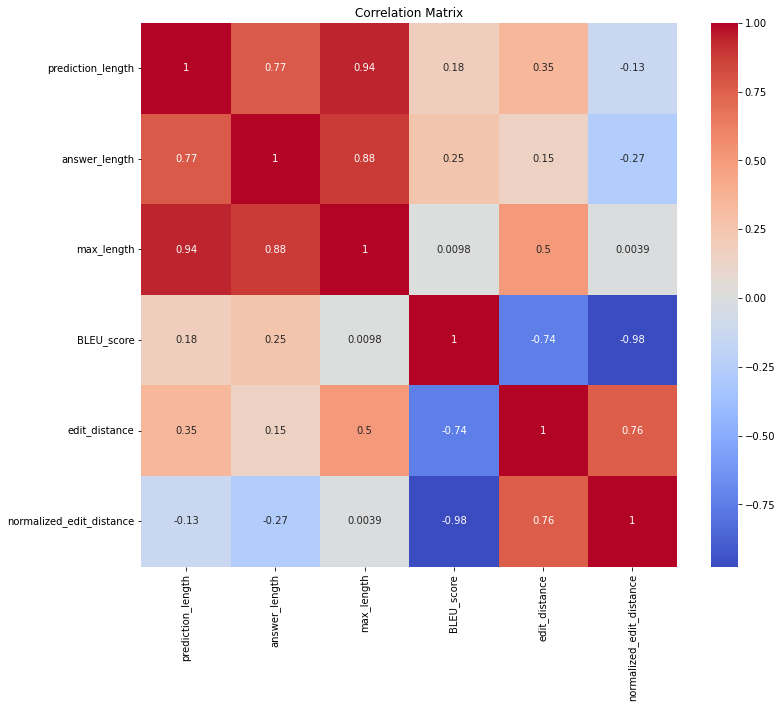

In [31]:
import seaborn as sns
correlation_matrix = df[metrics].corr()
plt.figure(figsize=(12,10))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

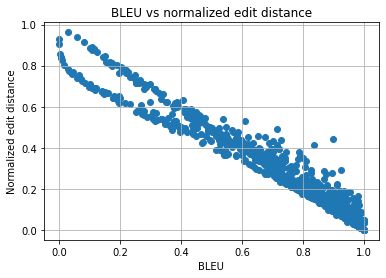

In [32]:
plt.scatter(df["BLEU_score"], df["normalized_edit_distance"])
plt.title("BLEU vs normalized edit distance")
plt.xlabel("BLEU")
plt.ylabel("Normalized edit distance")
plt.grid(True)
plt.show()
